# Machine Learning Tutorials

In machine learning a model refers to a method which implement a ML algorithm. Also in scikit-learn, models are called estimator.

We have two types of parameters in ML:
1. Parameters that estimator learns and computes from the input data
2. Parameters which we can initial them before use.(Hyperparameter)

Example:
In K-NN algorithm, K is a hyperparameter.

------------------------------------------------------------------------------------------------------------

## Problem #1 K-NN algorithm with DIGITs dataset

    Digits dataset is a builtin dataset which installs with scikit learn package. This datasets includes the numbers 0 to 9 so in this dataset we have 9 category. This dataset also has 1797 records which are 8\*8 pixels picture. All of the pictures are handwriting numbers and we want to use these picture to train our estimator to predict a handwriting number.

    First for simply we don't define the hyperparameter for our program. We use the default value that these variables have. It's good to know that in the real world we try to reach the best estimator by changing the hyperparameters values which is known as hyperparameter tuning.

------------------------------

### Load the data set with scikit learn

In [109]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy

digits = load_digits() # Let's load the digits dataset
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [110]:
data_df = pd.DataFrame(digits.data)
data_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [111]:
digits.data.shape

(1797, 64)

In [112]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [113]:
target_df = pd.DataFrame(digits.target, columns=["Label"])
target_df

,Label
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [114]:
digits.target.shape

(1797,)

Images instance consist of an array 8\*8 pixels for each of the data we have.

In [115]:
digits.images.shape

(1797, 8, 8)

As we have 8\*8 pixels we have 64 features. I mean each of these pixels are a feature for us.

In [116]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
59,1797.0,12.089037,4.374694,0.0,11.0,13.0,16.0,16.0
60,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
61,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
62,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0


Below you can see one of the images:

<Figure size 432x288 with 0 Axes>

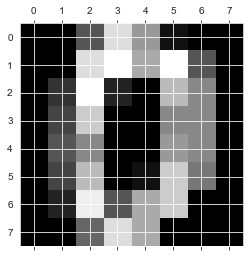

In [117]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In this 8\*8 pixels picture you can see  the number.

----

#### Readying the data

    Scikit-learn's algorithms need data with float number which are in 2-dimention array(Like a datafram type in pandas) which each of the rows are our data and records(instance) and each columns are each of those features. If we want to show these data in one single line we must change these 2-dim data into 1-dim data like what we did earlier.
    
    Note that if the data we want to use them are having a category characteristic(generally in data in string type like dog or cat categories.) we have a preprocessing step which turns these string values to the number value. For these preprocessing works sklearn.preprocessing module can help us. We don't have these kinds of values in digits data set so we are not going to preprocess the data.
    
    After the preprocessnig which we don't have in our problem here, we must convert the 2-dim matrix to 1-dim matrix. Which has been already implemented and we can see this by executing the below code:
    

In [118]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

### Visualizing data

    Having a true sense about the data is a important note. We call this sense of data, data exploration. we want to show the data with the help of matplotlib module.

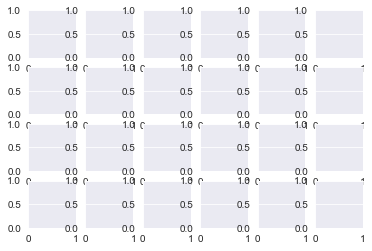

In [119]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

    The last method returns an object with the 6 * 4 dimention, consisting 24 figure in 4 rows and 6 columns. subplot returns each of these axes in an two-dimentional numpy array as you can see.

#### Showing images and deleting title of axes 

Now we want to use a for loop with zip method to read and put the first 24 picture of digits.images and first 24 values of the digits.target into the 24 object of the axes:

In [120]:
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axes tick marks
    axes.set_title(target)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

Know this
 1. ravel() method creates one dimensional array from a multi dimentional array.
 2. zip() method returns a tuple from the elements with same indexes, where the number of these tuples are equal to the lowest number of the elements that an argument has.

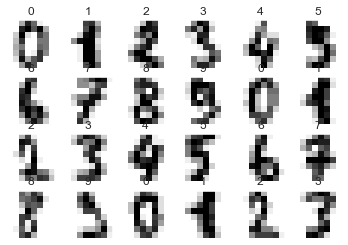

In [121]:
figure

### Test and Train
    We must divide the data into two subset, training and testing. It is important to have a test dataset because it can show that how much our model trained well. So now we must divide thedataset into two subset, we do this with helps of train_test_split() method from the sklearn.model_selection module. This method first shuffles the dataset(with help of the ShuffleSplit obejct) and then returns the train and test dataset. 
    
    tain_tetst_split() method returns a tuple with four values which are train dataset, test dataset, train main output(target), test main output(target).
        
    Note that we consider that the data are balanced distributed. Because having a couple of classes in the dataset, It's important to know if the data are balanced when we are selecting them or not.
    
    We use seed in random number generator for the ability of regenerating. In machine learning regenerating a sequence of equal number from the random numbers helps us to confirm the result of the different test. So random_state argument in train_test_split(0 method helps us doing this. So each time you call this method with a same number for the random_state, it generates the same train and test dataset.
**Let's do this:**

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

In [123]:
X_train.shape

(1347, 64)

In [124]:
X_test.shape

(450, 64)

### Size of the train and dataset

    If you noticed the the shape of the test and train, you see that train_test_split() method get 75% of the data as train data and 15% of it as the test data.
    If you want to determine the number of test yourself you can initial the test_size argument in the train_test_split() method or you can initial the train_size argument. These two arguments take a number between 0 to 1, Also we don't have to initial both.

e.g. **X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, train_size=0.90)**

In [125]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, train_size=0.90)

----

## Creating Model for K-NN
    KNeighborsClassifier estimator from sklearn.neighbors module implement k-nearest neighbor algorithm. To start first we initialize a object from this module.

In [126]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

### Train Model
    To train the model we need to send the train dataset to the estimator. We do this with the help of fit() method. fit() is a known method in most of the estimator in the scikit-learn module. fit method in the KNN only loads the dataset to the estimator. Because k-NN model doesn't need the initial train so it is lazy and this means that it only do its real work when we call it and it had to do it.

In [127]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

### Digit class prediction
    after training the model, Now we need to use the test data to see how good is our estimator doing.

In [128]:
predicted = knn.predict(X=X_test)
expected = y_test

In [129]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [130]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

let's see the pair of wrongs output that estimator, predict:

In [131]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(5, 3), (8, 9), (4, 9), (7, 3)]

In [132]:
X_test.shape

(180, 64)

We see that we have predicted 4 number from the whole(180 instances) test dataset we had, and this means that we are 97.78 % right.

### Estimator score
Let's see the score(accuracy) of estimator. From the score we want to see that how much our algorithm works well on the trained estimators.

In [133]:
f"{knn.score(X_test, y_test):.2%}"

'97.78%'

### Mean Absolute Error
let's check the MAE for this estimator

In [134]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predicted, expected)

0.06666666666666667

### Confusion Matrix
Let's copmute the Confusion Matrix. This Matrix shows the true and false predicted values

In [135]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 19,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 14]], dtype=int64)

Each row in this matrix is our label and its from 0 to 9 as our datasets varies from 0 to 9. for each i == j value(i=row and j is column) the value show us the number of right predicted. For example for digit 9(last row) we have predicted right for __14/16\*100__ percent. 

### Classification report
Let's take a report from the classification.

In [136]:
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]

print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        16
           3       1.00      0.92      0.96        24
           4       0.95      1.00      0.97        19
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00        17
           7       0.94      1.00      0.97        15
           8       0.93      1.00      0.97        14
           9       1.00      0.88      0.93        16

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



In [137]:
22/24*100

91.66666666666666

### Visualizing
Let's see the result in a figure

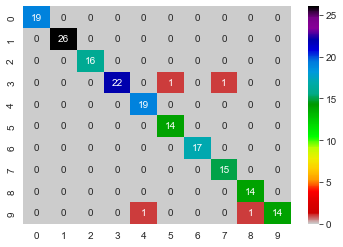

In [138]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

### K-fold cross-validation
helps us to get all the dataset for eighter train and test. It consider a layer and works on layer on each iterate to create a better estimator.

In [139]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)


In [140]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

cross_val_score this method returns an array of the precision

In [141]:
f"Mean accuracy: {scores.mean():.2%}"

'Mean accuracy: 98.78%'

In [142]:
f"Accuracy standard deviation: {scores.std():.2%}"

'Accuracy standard deviation: 0.74%'

__Let's check the KFOLD on different number of the k(this k is the number of neighbor to consider)__

In [143]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
                            X=digits.data, y=digits.target, cv=kfold)
    print(f"k={k:<2}; mean accuracy={scores.mean():.2%}; " + 
         f"standard deviation={scores.std():.2%}")

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.78%; standard deviation=0.74%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.83%; standard deviation=0.95%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


# More Models
Let's test a couple of more models and see the accuracy. It's common to test more models to find out wich estimator from which model works better.

In [144]:
# from sklearn.svm import svc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor

In [145]:
xgb = XGBRegressor(colsample_bytree = 1, learning_rate = 0.1, max_depth = 4, n_estimators = 500)
estimators = {
    'RndmForestClassifier': RandomForestClassifier(),
    'DcsionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': knn,
    'LinearRegression': LinearRegression(),
    'GaussianNB': GaussianNB(),
    'XGBRegressor': xgb
}


for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    
    scores = cross_val_score(estimator=estimator_object, X=digits.data, y=digits.target, cv=kfold)
    
    print(f"{estimator_name:>20}: " +
         f"mean accuracy = {scores.mean():.2%} " +
         f"standard deviation = {scores.std():.2%}", flush=True)

RndmForestClassifier: mean accuracy = 97.83% standard deviation = 1.20%
DcsionTreeClassifier: mean accuracy = 85.53% standard deviation = 1.22%
KNeighborsClassifier: mean accuracy = 97.66% standard deviation = 0.96%
    LinearRegression: mean accuracy = 56.56% standard deviation = 4.15%
          GaussianNB: mean accuracy = 84.48% standard deviation = 3.47%
        XGBRegressor: mean accuracy = 88.28% standard deviation = 2.71%


From the accuracy we can understand that __RandomForestClassifier__ and __KNeighborsClassifier__ works better on this kind of dataset.

# Finished